Lab Session 3

1) Navie Bayes

In this example, we will use the Naive Bayes algorithm to predict whether a person will play or not based on the weather conditions. The dataset contains the following attributes:

In [3]:
import pandas as pd

#Creat dataset
Weather_dataset = {
    'weather': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny',
                'overcast', 'overcast', 'rainy'],
    'temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot',
                    'Mild'],
    'play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
Weather_dataset = pd.DataFrame(Weather_dataset)

display(Weather_dataset)

,weather,temperature,play
0,sunny,Hot,No
1,sunny,Hot,No
2,overcast,Hot,Yes
3,rainy,Mild,Yes
4,rainy,Cool,Yes
5,rainy,Cool,No
6,overcast,Cool,Yes
7,sunny,Mild,Yes
8,sunny,Cool,Yes
9,rainy,Mild,Yes


We need to encode the features [Weather, Temperature], and target by converting string labels into numbers.

In [4]:
#Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
labelEncoder = preprocessing.LabelEncoder()

# Converting string labels into numbers.
encoded_weather = labelEncoder.fit_transform(Weather_dataset['weather'])
encoded_temperature = labelEncoder.fit_transform(Weather_dataset['temperature'])
encoded_play = labelEncoder.fit_transform(Weather_dataset['play'])

#print data
encoded_weather, encoded_temperature, encoded_play

(array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1]),
 array([1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2]),
 array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]))

In [5]:
#encoded features are the combined
features = [list(i) for i in zip(encoded_weather, encoded_temperature)]

Next we generate a model using navie bayes classifier

In [6]:
#Import Categorical Navie Bays model
from sklearn.naive_bayes import CategoricalNB

#Creat the model
model = CategoricalNB()

#Train the model
model.fit(features, encoded_play)

CategoricalNB()

Our model is ready to be tested

In [7]:
#Predict Output (sunny and hot)
predicted = model.predict([[0, 1]])  # 0:Overcast, 2:Mild
print("Can I play?", labelEncoder.inverse_transform(predicted))

predicted = model.predict([[1, 0]])  # 0:rain, 2:cold
print("Can I play?", labelEncoder.inverse_transform(predicted))

Can I play? ['Yes']
Can I play? ['Yes']


Exercise 1

In this exercise you will train a Navie Bayes model using the blood_tranfusion dataset https://github.com/INRIA/scikit-learn-mooc/blob/main/datasets/blood_transfusion.csv

1) Import the blood_transfusion dataset, and display the donated and not donated samples
2) Train your Naive Bayes model
3) Predict the class for this following vectors (0, 500, 1000, 28) and (4,10, 4000, 64)

In [8]:
#Import the blood_transfusion dataset, and display the donated and not donated samples

blood_transfusion = pd.read_csv("./datasets/blood_transfusion.csv")

blood_transfusion.sample(10)

,Recency,Frequency,Monetary,Time,Class
350,11,1,250,11,not donated
440,16,3,750,46,not donated
500,2,43,10750,86,donated
144,4,2,500,9,donated
198,11,7,1750,29,not donated
224,4,1,250,4,donated
289,14,3,750,19,donated
626,9,9,2250,54,not donated
459,21,1,250,21,not donated
562,4,16,4000,98,donated


In [9]:
#Train your Naive Bayes model

#creating labelEncoder
labelEncoderBlood = preprocessing.LabelEncoder()

# Converting string labels into numbers.
encoded_recency = labelEncoderBlood.fit_transform(blood_transfusion['Recency'])
encoded_frequency = labelEncoderBlood.fit_transform(blood_transfusion['Frequency'])
encoded_monetary = labelEncoderBlood.fit_transform(blood_transfusion['Monetary'])
encoded_time = labelEncoderBlood.fit_transform(blood_transfusion['Time'])
encoded_class = labelEncoderBlood.fit_transform(blood_transfusion['Class'])

#encoded features are the combined
features_blood = [list(i) for i in zip(encoded_recency, encoded_frequency, encoded_monetary, encoded_time)]

#Creat the model
modelBlood = CategoricalNB()

#Train the model
modelBlood.fit(features_blood, encoded_class)

CategoricalNB()

In [10]:
#Predict the class for this following vectors (0, 500, 1000, 28) and (4,10, 4000, 64)

#Predict Output (0, 500, 1000, 28)
##predicted = modelBlood.predict([[0, 500, 1000, 28]])
##print("Can I donate?", labelEncoderBlood.inverse_transform(predicted))

#Predict Output (4,10, 4000, 64)
##predicted = modelBlood.predict([[4, 10, 4000, 64]])
##print("Can I donate?", labelEncoderBlood.inverse_transform(predicted))

Exercise 2

Marks secured by students in highschool are classified according to different caracteristics (gender, race, etc), take a look at the dataset : https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv

1) Does parental level of education affect the reading score ?
2) Does test preparation course help to score better ?
3) What is the ethnicity of students ?
4) Using th Navie Bayes method, train your model to predict the different scores (math, reading, writing) of the following students caracteristics :
- [female, group A, some college, free/reduced, completed]
- [male, group D, high school, standard, none]
- [female, group B, associate's degree, standard, none]
- [male, group C, master's degree, free/reduced, none]

In [11]:
##Unique value of each column
studentsPerformance = pd.read_csv("./datasets/StudentsPerformance.csv")

uniqueValeur = []

for col in studentsPerformance.columns:
    uniqueValeur.append([col, studentsPerformance[col].unique()])

print(uniqueValeur)

[['gender', array(['female', 'male'], dtype=object)], ['race/ethnicity', array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)], ['parental level of education', array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)], ['lunch', array(['standard', 'free/reduced'], dtype=object)], ['test preparation course', array(['none', 'completed'], dtype=object)], ['math score', array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])], ['reading score', array([ 72,  90,  95,  57,  78,  83

In [12]:
#Does parental level of education affect the reading score ?

##Lire colonne Parental level of education : "bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school'

resScoreReading = []

for element in uniqueValeur[2][1]:
    resScoreReading.append([element, []])
    for row in studentsPerformance.values:
        if element == row[2]:
            resScoreReading[-1][1].append(row[5])

for element in resScoreReading:
    print(element[0], " : ", sum(element[1]) / len(element[1]))

bachelor's degree  :  69.38983050847457
some college  :  67.1283185840708
master's degree  :  69.7457627118644
associate's degree  :  67.88288288288288
high school  :  62.13775510204081
some high school  :  63.497206703910614


In [13]:
#Does test preparation course help to score better ?

resPrepa = [[], []]  #0 = none, 1 = completed

for row in studentsPerformance.values:
    if row[4] == "none":
        resPrepa[0].append(row[5])
    else:
        resPrepa[1].append(row[5])

print("none : ", sum(resPrepa[0]) / len(resPrepa[0]))
print("completed : ", sum(resPrepa[1]) / len(resPrepa[1]))

none :  64.0778816199377
completed :  69.69553072625699


In [14]:
#What is the ethnicity of students ?


In [15]:
#Entraine model

#creating labelEncoder
labelEncoderScore = preprocessing.LabelEncoder()

# Converting string labels into numbers.
encoded_gender = labelEncoderScore.fit_transform(studentsPerformance['gender'])
encoded_race = labelEncoderScore.fit_transform(studentsPerformance['race/ethnicity'])
encoded_parental = labelEncoderScore.fit_transform(studentsPerformance['parental level of education'])
encoded_lunch = labelEncoderScore.fit_transform(studentsPerformance['lunch'])
encoded_prep = labelEncoderScore.fit_transform(studentsPerformance['test preparation course'])

encoded_math = labelEncoderScore.fit_transform(studentsPerformance['math score'])
encoded_reading = labelEncoderScore.fit_transform(studentsPerformance['reading score'])
encoded_writing = labelEncoderScore.fit_transform(studentsPerformance['writing score'])

#encoded_gender : female = 0, male = 1
#encoded_race : A = 0, B = 1, C = 2, D = 3
#encoded_parental : some college = 0, some high school = 1, high school = 2, associate's degree = 3, bachelor's degree = 4, master's degree = 5
#encoded_lunch : standard = 0, free/reduced = 1
#encoded_prep : none = 0, completed = 1

#encoded features are the combined
featuresStudent = [list(i) for i in zip(encoded_gender, encoded_race, encoded_parental, encoded_lunch, encoded_prep)]


groupe = [encoded_math, encoded_reading, encoded_writing]
matiere = ["Maths", "Reading", "Writing"]

def note(groupe, param, matiere):
    k = 0
    for element in groupe:
        #Creat the model
        modelStudent = CategoricalNB()
        #Train the model
        modelStudent.fit(featuresStudent, element)
        #Predict Output (sunny and hot)
        predicted1 = modelStudent.predict(param)
        print("Note ?", matiere[k], labelEncoderScore.inverse_transform(predicted1))
        k += 1


In [16]:
#Using th Navie Bayes method, train your model to predict the different scores (math, reading, writing) of the following students caracteristics :

print('[female, group A, some college, free/reduced, completed]')
note(groupe, [[0, 0, 0, 1, 1]], matiere)

#[male, group D, high school, standard, none]
note(groupe, [[1, 3, 2, 0, 0]], matiere)

print('female, group B, associate\'s degree, standard, none')
note(groupe, [[0, 1, 3, 0, 0]], matiere)

print('[male, group C, master\'s degree, free/reduced, none]')

note(groupe, [[1, 2, 5, 1, 0]], matiere)

[female, group A, some college, free/reduced, completed]
Note ? Maths [69]
Note ? Reading [69]
Note ? Writing [73]
Note ? Maths [78]
Note ? Reading [62]
Note ? Writing [60]
female, group B, associate's degree, standard, none
Note ? Maths [56]
Note ? Reading [81]
Note ? Writing [87]
[male, group C, master's degree, free/reduced, none]
Note ? Maths [71]
Note ? Reading [80]
Note ? Writing [77]


2) LDA

in this example we use the iris dataset to train an LDA model

In [17]:
#Import Library
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#load iris dataset
iris = load_iris()

#convert dataset to pandas dataframe
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names'] + ['target'])
df['species']= pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

x = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['target']

#difine data to plot
X = iris.data
Y = iris.target

modelLDA = LinearDiscriminantAnalysis()
data_plot = modelLDA.fit(X, y).transform(X)
target_names = iris.target_names

After LDA transformation, we can plot our new dataset

********************************** LDA Summary **********************************
Classes:  [0. 1. 2.]
Coefficients:  [[  6.31475846  12.13931718 -16.94642465 -20.77005459]
 [ -1.53119919  -4.37604348   4.69566531   3.06258539]
 [ -4.78355927  -7.7632737   12.25075935  17.7074692 ]]
Explained Variance ratio:  [0.9912126 0.0087874]


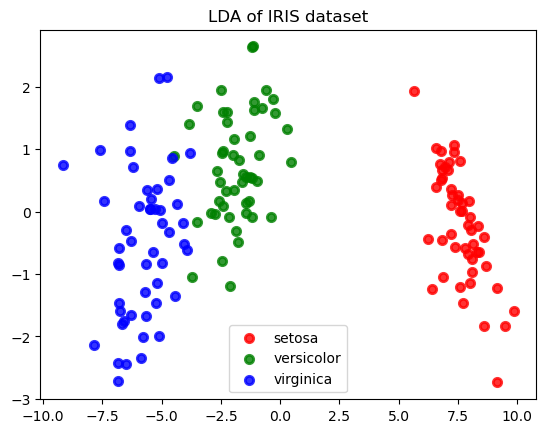

In [19]:
#create LDA plot

import matplotlib.pyplot as plt
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[Y == i, 0], data_plot[Y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

#add lengend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#add title to plot
plt.title('LDA of IRIS dataset')

print('********************************** LDA Summary **********************************')
print('Classes: ', modelLDA.classes_)
print('Coefficients: ', modelLDA.coef_)
print('Explained Variance ratio: ', modelLDA.explained_variance_ratio_)

#display LDA plot
plt.show()

Exercice

In this exercice, we will simplify and display a multicritera classification dataset. You will use a record of league of legends ranked games, you can explore and visualize the dataset from the following link : https://www.kaggle.com/datasets/gyejr95/league-of-legends-challenger-ranked-games2020 first import challenger dataset from the data explorer.

1) Does having first blood affect on winning the game ?
2) What is the average game duration of challenger ranked game ?
3) Is your dataset separable based on winning and losing classification ?

Optional :
4) Merge the 3 datasets and add column relative to rank
5) Is your dataset now seperable ?

In [20]:
#1) Does having first blood affect on winning the game ?

challenge = pd.read_csv("./datasets/leagueOfLegends/Challenger_Ranked_Games.csv")

#Faire une LDA pour voir si le fait d'avoir le premier blood influe sur la victoire
dfLOL = pd.DataFrame(data = np.c_[challenge['blueFirstBlood'], challenge['redFirstBlood'], challenge['blueWins']],
                  columns = ['blueFirstBlood', 'redFirstBlood'] + ['blueWins'])
dfLOL['team'] = pd.Categorical.from_codes(challenge['blueWins'], ['blue', 'red'])
dfLOL.columns = ['blueFirstBlood', 'redFirstBlood', 'blueWins', 'team']

XLOL = dfLOL[['blueFirstBlood', 'redFirstBlood']]
YLOL = dfLOL['team']

#difine data to plot
xLOL = dfLOL[['blueFirstBlood', 'redFirstBlood', 'blueWins']]
yLOL = dfLOL['blueWins']

modelLDALOL = LinearDiscriminantAnalysis()
data_plotLOL = modelLDALOL.fit(XLOL, yLOL).transform(XLOL)
target_namesLOL = dfLOL['team'].unique()

#create LDA plot
plt.figure()
colors = ['red', 'green']
lw = 2
for color, i, target_name in zip(colors, [0, 1], target_namesLOL):
    plt.scatter(data_plotLOL[YLOL == i, 0], data_plotLOL[YLOL == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

#add lengend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#add title to plot
plt.title('LDA of League of Legends dataset')

print('********************************** LDA Summary **********************************')
print('Classes: ', modelLDALOL.classes_)
print('Coefficients: ', modelLDALOL.coef_)
print('Explained Variance ratio: ', modelLDALOL.explained_variance_ratio_)

#display LDA plot
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 640x480 with 0 Axes>

In [21]:
#2) What is the average game duration of challenger ranked game ?

#average game duration
print("Average game duration : ", challenge['gameDuraton'].mean())

#sum = 0
#for element in challenge['gameDuraton']:
#    sum+= element
#print("Average game duration : ", sum / len(challenge['gameDuraton']))

Average game duration :  1448.6536574487066


#3) Is your dataset separable based on winning and losing classification ?

Non, car les données ne sont pas linéairement séparables

3. QDA

The olivetti faces.

We need to import the Olivetti faces dataset from sklearn.datasets. The dataset contains 400 images of 40 different people. Each image is 64x64 pixels. The dataset is already split into a training set (X_train, y_train) and a test set (X_test, y_test). The dataset is already normalized, so the pixel values are between 0 and 1.

https://scikit-learn.org/stable/datasets/real_world.html?highlight=olivetti

In [22]:
from sklearn.datasets import fetch_olivetti_faces

faces, labels = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=42)
n_samples, n_features = faces.shape

print("Dataset consists of %d faces" % n_samples)
print("Each face has %d pixels" % n_features)

#We can see all labels that exist in the dataset by runing this code

import numpy as np
print("Labels: ", np.unique(labels))

Dataset consists of 400 faces
Each face has 4096 pixels
Labels:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
